<a href="https://colab.research.google.com/github/SpringBoardMentor193s/SentinelNet_Oct_Batch/blob/ganesh/smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
    'feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170],
    'target': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]  # Highly imbalanced, added more minority samples
}
df = pd.DataFrame(data)

X = df[['feature1', 'feature2']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Original class distribution in training set: {Counter(y_train)}")

sm = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Resampled class distribution in training set: {Counter(y_train_res)}")

Original class distribution in training set: Counter({0: 8, 1: 3})
Resampled class distribution in training set: Counter({1: 8, 0: 8})


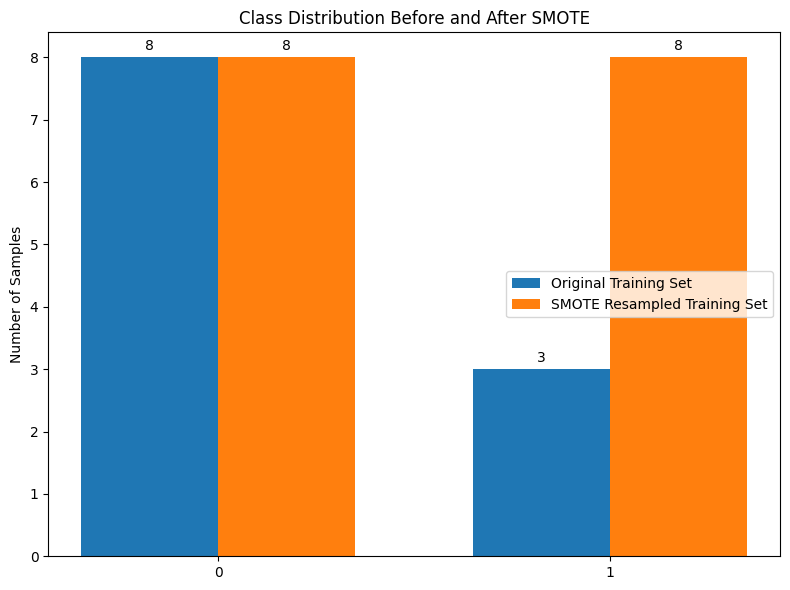

In [8]:
import matplotlib.pyplot as plt

original_counts = Counter(y_train)
resampled_counts = Counter(y_train_res)

labels = sorted(original_counts.keys())
original_values = [original_counts[label] for label in labels]
resampled_values = [resampled_counts[label] for label in labels]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar([i - width/2 for i in x], original_values, width, label='Original Training Set')
rects2 = ax.bar([i + width/2 for i in x], resampled_values, width, label='SMOTE Resampled Training Set')

ax.set_ylabel('Number of Samples')
ax.set_title('Class Distribution Before and After SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()